In [14]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore
from matplotlib import cm
from sklearn.cluster import AgglomerativeClustering 
from scipy.cluster.hierarchy import cophenet, dendrogram, linkage
from scipy.spatial.distance import pdist

In [15]:
data = pd.read_excel("Credit Card Customer Data.xlsx")
data.head()

Sl_No  Customer Key  Avg_Credit_Limit  Total_Credit_Cards  \
0      1         87073            100000                   2   
1      2         38414             50000                   3   
2      3         17341             50000                   7   
3      4         40496             30000                   5   
4      5         47437            100000                   6   

   Total_visits_bank  Total_visits_online  Total_calls_made  
0                  1                    1                 0  
1                  0                   10                 9  
2                  1                    3                 4  
3                  1                    1                 4  
4                  0                   12                 3

In [16]:
#There are duplicates in the dataset. Our next step would be delete the repeated rows
data[data.duplicated(subset=['Customer Key'])]

Sl_No  Customer Key  Avg_Credit_Limit  Total_Credit_Cards  \
332    333         47437             17000                   7   
398    399         96929             67000                   6   
432    433         37252             59000                   6   
541    542         50706             60000                   7   
632    633         97935            187000                   7   

     Total_visits_bank  Total_visits_online  Total_calls_made  
332                  3                    1                 0  
398                  2                    2                 2  
432                  2                    1                 2  
541                  5                    2                 2  
632                  1                    7                 0

In [17]:
#Deleting the duplictes from the dataset
data.drop_duplicates(subset=['Customer Key'],inplace=True)

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 655 entries, 0 to 659
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Sl_No                655 non-null    int64
 1   Customer Key         655 non-null    int64
 2   Avg_Credit_Limit     655 non-null    int64
 3   Total_Credit_Cards   655 non-null    int64
 4   Total_visits_bank    655 non-null    int64
 5   Total_visits_online  655 non-null    int64
 6   Total_calls_made     655 non-null    int64
dtypes: int64(7)
memory usage: 40.9 KB


In [19]:
data.dtypes

Sl_No                  int64
Customer Key           int64
Avg_Credit_Limit       int64
Total_Credit_Cards     int64
Total_visits_bank      int64
Total_visits_online    int64
Total_calls_made       int64
dtype: object

In [20]:
data.shape

(655, 7)

In [21]:
#Looking at the details of the dataset and how the data is distributed across all columns
data.describe()

Sl_No  Customer Key  Avg_Credit_Limit  Total_Credit_Cards  \
count  655.000000    655.000000        655.000000          655.000000   
mean   329.450382  55058.158779      34242.748092            4.691603   
std    190.788562  25606.965469      37240.896986            2.169325   
min      1.000000  11265.000000       3000.000000            1.000000   
25%    164.500000  33623.500000      10000.000000            3.000000   
50%    328.000000  53898.000000      18000.000000            5.000000   
75%    494.500000  77084.500000      48000.000000            6.000000   
max    660.000000  99843.000000     200000.000000           10.000000   

       Total_visits_bank  Total_visits_online  Total_calls_made  
count         655.000000           655.000000        655.000000  
mean            2.401527             2.606107          3.601527  
std             1.633648             2.940380          2.867352  
min             0.000000             0.000000          0.000000  
25%             1.000000             1.000000          1.000000  
50%             2.000000             2.000000          3.000000  
75%             4.000000             4.000000          5.000000  
max             5.000000            15.000000         10.000000

In [22]:
#Check for any missing data
data.isna().sum()

Sl_No                  0
Customer Key           0
Avg_Credit_Limit       0
Total_Credit_Cards     0
Total_visits_bank      0
Total_visits_online    0
Total_calls_made       0
dtype: int64

In [23]:
#Examine the correkation between dimensions
data.corr(method='kendall')

Sl_No  Customer Key  Avg_Credit_Limit  \
Sl_No                1.000000      0.032612          0.509538   
Customer Key         0.032612      1.000000          0.045078   
Avg_Credit_Limit     0.509538      0.045078          1.000000   
Total_Credit_Cards   0.555116     -0.007965          0.390498   
Total_visits_bank    0.303724      0.000221          0.084016   
Total_visits_online -0.266399      0.001890         -0.081997   
Total_calls_made    -0.484315      0.001955         -0.325374   

                     Total_Credit_Cards  Total_visits_bank  \
Sl_No                          0.555116           0.303724   
Customer Key                  -0.007965           0.000221   
Avg_Credit_Limit               0.390498           0.084016   
Total_Credit_Cards             1.000000           0.299285   
Total_visits_bank              0.299285           1.000000   
Total_visits_online           -0.247546          -0.513861   
Total_calls_made              -0.491535          -0.377575   

                     Total_visits_online  Total_calls_made  
Sl_No                          -0.266399         -0.484315  
Customer Key                    0.001890          0.001955  
Avg_Credit_Limit               -0.081997         -0.325374  
Total_Credit_Cards             -0.247546         -0.491535  
Total_visits_bank              -0.513861         -0.377575  
Total_visits_online             1.000000          0.314370  
Total_calls_made                0.314370          1.000000

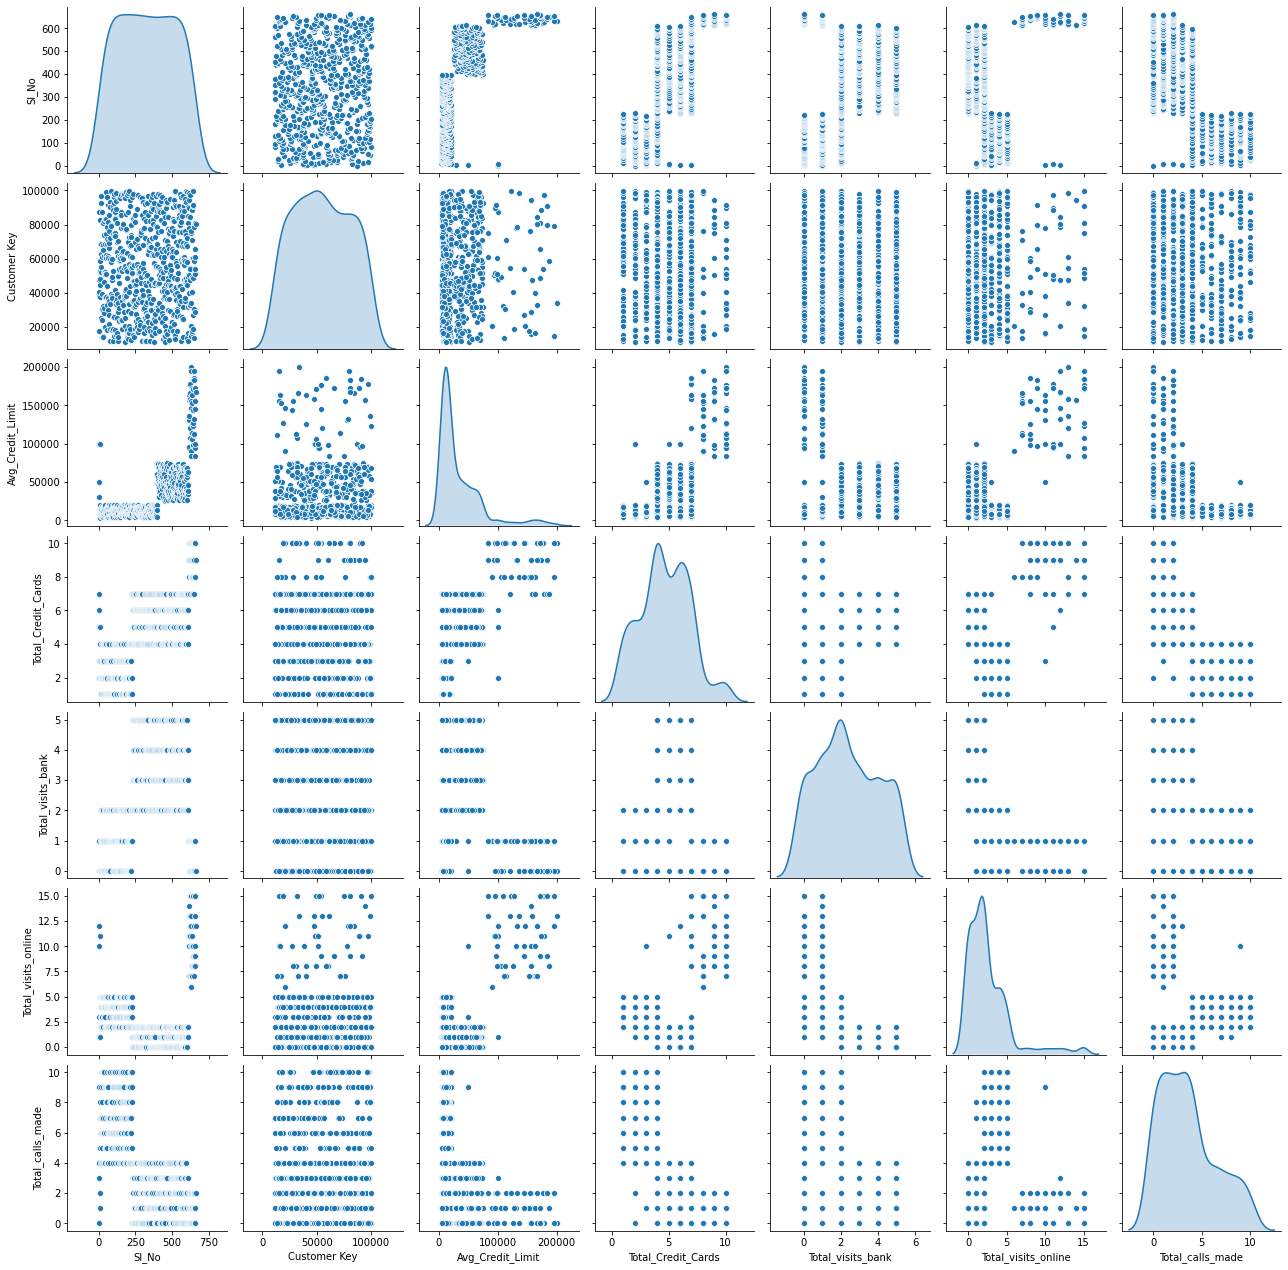

In [24]:
#Pair plot might give some insight to the number of clusters that the data might have
sns.pairplot(data,diag_kind='kde')

In [25]:
#Dropping the variables that arent needed
data = data.drop(['Sl_No','Customer Key'],axis=1)

In [26]:
#Normalize the variables
data = data.apply(zscore)

In [27]:
data.head()

Avg_Credit_Limit  Total_Credit_Cards  Total_visits_bank  \
0          1.767076           -1.241704          -0.858568   
1          0.423440           -0.780379          -1.471163   
2          0.423440            1.064922          -0.858568   
3         -0.114014            0.142271          -0.858568   
4          1.767076            0.603597          -1.471163   

   Total_visits_online  Total_calls_made  
0            -0.546642         -1.257006  
1             2.516526          1.884177  
2             0.134062          0.139075  
3            -0.546642          0.139075  
4             3.197230         -0.209945

In [28]:
#Cluster Building
cluster_range = range(1,10)
cluster_errors = []
for num_clusters in cluster_range:
    clusters = KMeans(num_clusters, n_init = 5)
    clusters.fit(data)
    labels = clusters.labels_
    centroids = clusters.cluster_centers_
    cluster_errors.append(clusters.inertia_)

clusters_df = pd.DataFrame({"num_clusters": cluster_range, "cluster_errors": cluster_errors})
clusters_df[0:15]

num_clusters  cluster_errors
0             1     3275.000000
1             2     2024.335826
2             3      924.733015
3             4      775.003409
4             5      698.958221
5             6      636.314031
6             7      597.310470
7             8      570.489654
8             9      537.871858

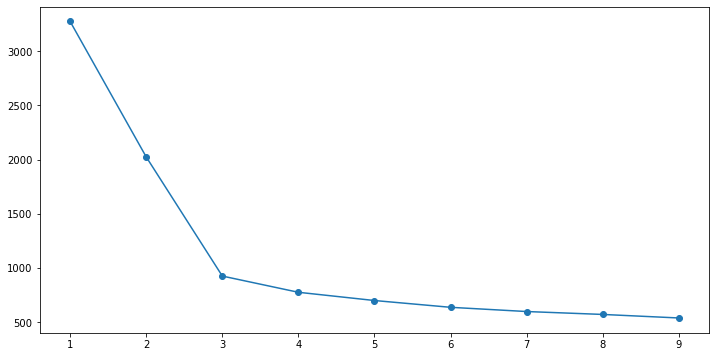

In [29]:
#Having a figure to detrmine the number of clusters using Elbow point
plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )

In [30]:
#Elbow point is @ 4
kmeans = KMeans(n_clusters=4, n_init = 5, random_state=12345)
kmeans.fit(data)

KMeans(n_clusters=4, n_init=5, random_state=12345)

In [31]:
#Calucalting and displaying the Silhouette score for K-means clustering 
score_kmeans = silhouette_score(data, kmeans.labels_, metric='euclidean')
score_kmeans

0.3550820814050133

In [32]:
# Check the number of data points in each cluster

labels = kmeans.labels_
counts = np.bincount(labels[labels>=0])
print(counts)

[196 221  49 189]


In [33]:
#centers in each group
centroids = kmeans.cluster_centers_
centroid_df = pd.DataFrame(centroids, columns = list(data) )
centroid_df.transpose()

0         1         2         3
Avg_Credit_Limit     0.039818 -0.593224  2.844727 -0.085151
Total_Credit_Cards   0.377641 -1.060097  1.884010  0.359509
Total_visits_bank    0.047822 -0.902919 -1.108607  1.293617
Total_visits_online -0.558797  0.329649  2.849932 -0.544841
Total_calls_made    -0.528693  1.159288 -0.872371 -0.581125

In [34]:
# Add cluster number to original  data
predictions = kmeans.predict(data)
predictions
data["group"] = predictions
data['group'] = data['group'].astype('category')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff0c29208e0>,
      dtype=object)

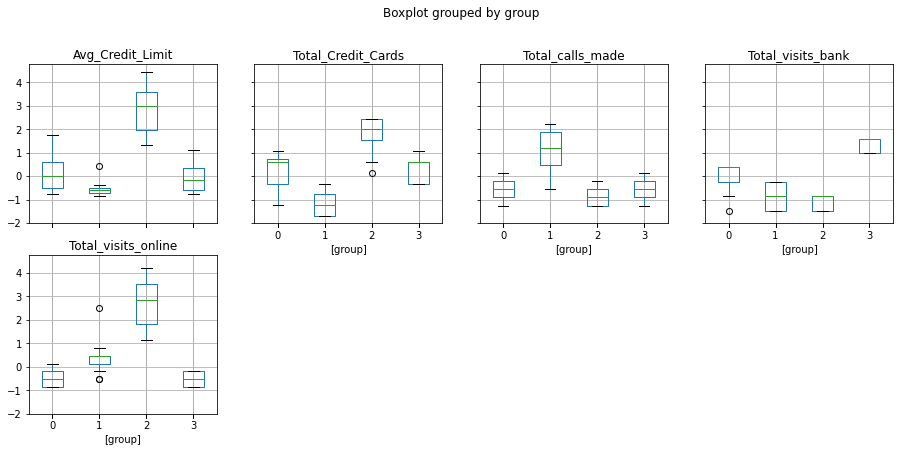

In [35]:
# Visualize the centers

data["group"] = predictions
data.boxplot(by = 'group',  layout=(3,4), figsize=(15, 10))

In [36]:
#removing the 'groups' variable defined in the K-means clustering
data_hier = data.drop(['group'],axis=1)

In [37]:
#Doing the Hierarchical Clustering
hier_model = AgglomerativeClustering(n_clusters=3, affinity='euclidean',  linkage='average')
hier_model.fit(data_hier) 

AgglomerativeClustering(linkage='average', n_clusters=3)

In [38]:
#Number of customers in each of the defined labels in the dataset
data_hier['labels'] = hier_model.labels_
data_hier.head(10)
data_hier.groupby(["labels"]).count()

Avg_Credit_Limit  Total_Credit_Cards  Total_visits_bank  \
labels                                                            
0                    383                 383                383   
1                     49                  49                 49   
2                    223                 223                223   

        Total_visits_online  Total_calls_made  
labels                                         
0                       383               383  
1                        49                49  
2                       223               223

In [39]:
#Calucalting and sisplaying the Cophenet
Z = linkage(data_hier, metric='euclidean', method='average')
c, coph_dists = cophenet(Z , pdist(data_hier))
c

0.9253806597233062

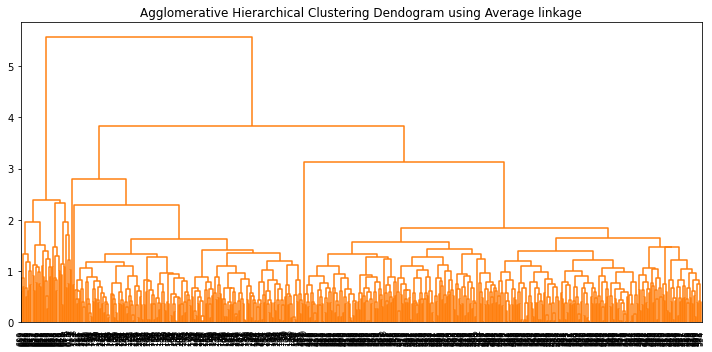

In [40]:
#View the Dendogram using Average linkage
plt.figure(figsize=(10, 5))
plt.title('Agglomerative Hierarchical Clustering Dendogram using Average linkage')
dendrogram(Z, leaf_rotation=90.,color_threshold = 40, leaf_font_size=8. )
plt.tight_layout()

In [41]:
#Performing the clustering using different linkages
Z = linkage(data_hier, metric='euclidean', method='complete')
c, coph_dists = cophenet(Z , pdist(data_hier))
c

0.9097427739042356

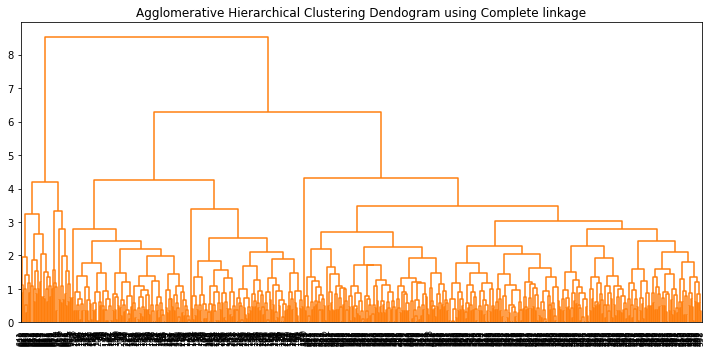

In [42]:
plt.figure(figsize=(10, 5))
plt.title('Agglomerative Hierarchical Clustering Dendogram using Complete linkage')
dendrogram(Z, leaf_rotation=90.,color_threshold = 40, leaf_font_size=8. )
plt.tight_layout()

In [43]:
Z = linkage(data_hier, metric='euclidean', method='ward')
c, coph_dists = cophenet(Z , pdist(data_hier))
c

0.81533547474666

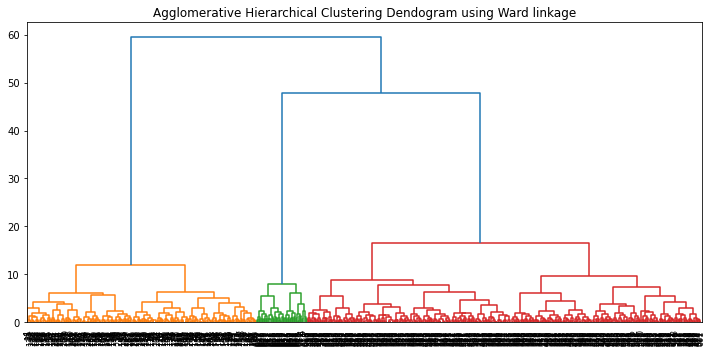

In [44]:
plt.figure(figsize=(10, 5))
plt.title('Agglomerative Hierarchical Clustering Dendogram using Ward linkage')
dendrogram(Z, leaf_rotation=90.,color_threshold = 40, leaf_font_size=8. )
plt.tight_layout()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff110e97940>,
      dtype=object)

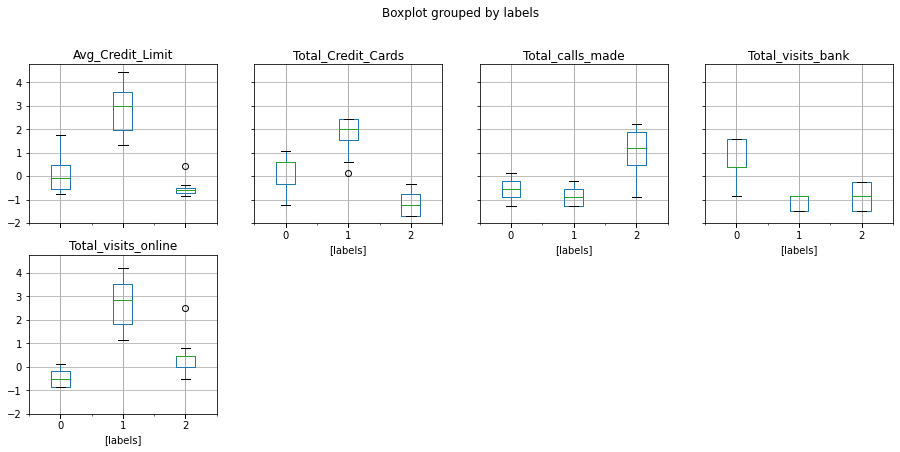

In [45]:
#Box plots on the clusters
data_hier.boxplot(by = 'labels',  layout=(3,4), figsize=(15, 10))

In [46]:
#Calculate and display the Silhouette score using Hierarchical Clustering
score_hier = silhouette_score(data_hier, kmeans.labels_, metric='euclidean')
score_hier

0.3864747667612148

In [47]:
#Comparing the Silhouette score using the clustering techniques
print(f"Silhouette Score\nKmeans:{score_kmeans}\nHieracrhical Clustering:{score_hier}")

Silhouette Score
Kmeans:0.3550820814050133
Hieracrhical Clustering:0.3864747667612148


In [48]:
#Key Questions:

# How many different segments of customers are there?
#Answer: There are 3 types customers 
# How are these segments different from each other?
#Answer: Group 1 has: Low Credit Limit, posses 1-2 credit cards,Low calls made, High visits to the branch, Low online visits
#Group 2 has: Very high credit limit, more than 1 credit card, low calls made, low visit to the branch, very high online visits
#Group 3: Very low credit limit, 0 credit cards,highest call made among the groups, some customers prefer to visit the branch, moderate use of online visits
# What are your recommendations to the bank on how to better market to and service these customers?
#Answer: For Group 1: Increase cedit limit so as to get them spending more, encourage more online interaction
#For Group 2: Upsell more offers for adding a new credit cards
#For Group 3: Try to have them onboard for having a credit card, incentivise the usage of credit card.